Para resolver este ejercicio, primero definimos la función de Likelihood y las probabilidades posteriores, aplicando el teorema de Bayes. En este caso, queremos determinar la probabilidad posteriori del sesgo de la moneda (p), basándonos en el número de caras y secas observadas, utilizando dos priors: uno uniforme y otro gaussiano.La idea es comparar ambas distribuciones.
La probabilidad de obtener \( k \) caras en \( n \) lanzamientos, dada una probabilidad \( p \), está dada por la distribución binomial:

$$
L(p) = \binom{n}{k} p^k (1 - p)^{n - k}
$$

donde:
- \( n = 100 \) es el número total de lanzamientos,
- \( k = 60 \) es el número de caras,
- \( p \) es la probabilidad de obtener cara (el parámetro que estamos buscando).
En este caso, el prior uniforme es \( P(p) = 1 \) para \( p \in [0, 1] \). Según el teorema de Bayes, la probabilidad posterior \( P(p \mid D) \) se calcula como:

$$
P(p \mid D) \propto L(p) P(p)
$$

donde \( D \) representa los datos observados. Debido al prior uniforme, simplemente multiplicamos la verosimilitud por \( P(p) = 1 \), lo que da como resultado:

$$
P(p \mid D) \propto p^{60} (1 - p)^{40}
$$
Para un prior gaussiano con media \( 0.5 \) y desviación estándar \( 0.1 \), la distribución prior es:

$$
P(p) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left( -\frac{(p - 0.5)^2}{2 \sigma^2} \right)
$$

donde \( \sigma = 0.1 \). Entonces, la probabilidad posterior es:

$$
P(p \mid D) \propto p^{60} (1 - p)^{40} \exp \left( -\frac{(p - 0.5)^2}{2 \times (0.1)^2} \right)
$$


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats as st
from math import comb

In [21]:
Tiros=100
caras=60
secas=40

In [22]:
#Definimos la funcion verosimilitud, distribucion binomial
def likelihood(p,k,n):
    L=comb(n,k)*(p**k)*((1-p)**(n-k))
    return(L)

In [23]:
likelihood(p=100,k=60,n=100)

919584243022829686424313608970901706545258034539779347691797145274851643542927045193944587623372562004489720000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [24]:
#Queremos definir los priors, para esto necesitamos darle una suerte de condicion.

def priors_uniforme(p):
    if 0<=p<=1: 
        return(1) # Prior uniforme, constante en [0, 1]
    else:
        return(0)

In [25]:
print(priors_uniforme(p=0.1))
print(priors_uniforme(2))

1
0


In [26]:
#Ahora para definir la probabilidad posterior solo se multiplica el likelihood por el prior
def probabilidad_posterior_uniforme(p,k,n):
    L=likelihood(p,k,n)
    P=priors_uniforme(p)
    prob_post=L*P
    return(prob_post)

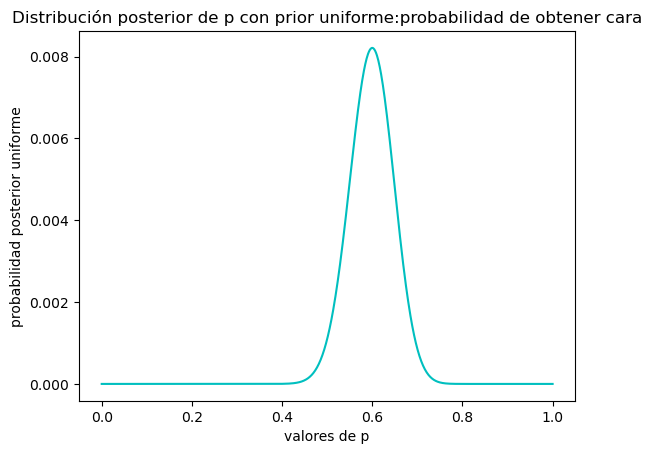

In [27]:
#Grafiquemos la probabilidad uniforme en principio
valores_p=np.linspace(0,1,1000)
probabilidades_unif = [] 
for p in valores_p:
    probabilidad = probabilidad_posterior_uniforme(p, caras, Tiros)
    probabilidades_unif.append(probabilidad)
p_unif_norm=probabilidades_unif/np.sum(probabilidades_unif)
plt.plot(valores_p,p_unif_norm,color='#00BFBF')
plt.xlabel('valores de p')
plt.ylabel('probabilidad posterior uniforme')
plt.title('Distribución posterior de p con prior uniforme:probabilidad de obtener cara')
plt.show()

Ahora queremos definir la distribucion gaussiana, ya tenemos definida la funcion likelihood, nos faltaria definir los prior gaussianos y luego la probabilidad posterior gaussiana.

In [28]:
def priors_gaussiano(p,mu=0.5,sigma=0.1):
    P= st.norm.pdf(p,mu,sigma) # Prior gaussiano centrado en 0.5 con desviación estándar 0.1
    return(P)

In [29]:
def probabilidad_posterior_gaussiana(p,k,n):
    P=priors_gaussiano(p,mu=0.5,sigma=0.1)
    L=likelihood(p,k,n)
    prob_post=P*L
    return(prob_post)

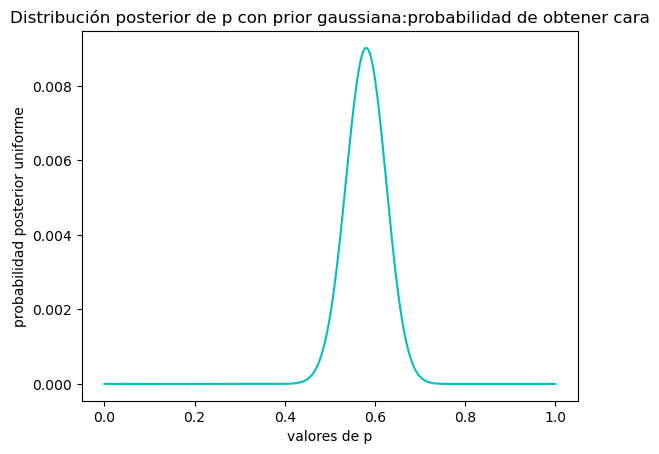

In [30]:
#Grafiquemos la probabilidad uniforme en principio
valores_p=np.linspace(0,1,1000)
probabilidades_gauss = [] 
for p in valores_p:
    probabilidad = probabilidad_posterior_gaussiana(p, caras, Tiros)
    probabilidades_gauss.append(probabilidad)
p_gauss_norm=probabilidades_gauss/np.sum(probabilidades_gauss)
plt.plot(valores_p,p_gauss_norm,color='#00BFBF')
plt.xlabel('valores de p')
plt.ylabel('probabilidad posterior uniforme')
plt.title('Distribución posterior de p con prior gaussiana:probabilidad de obtener cara')

plt.show()

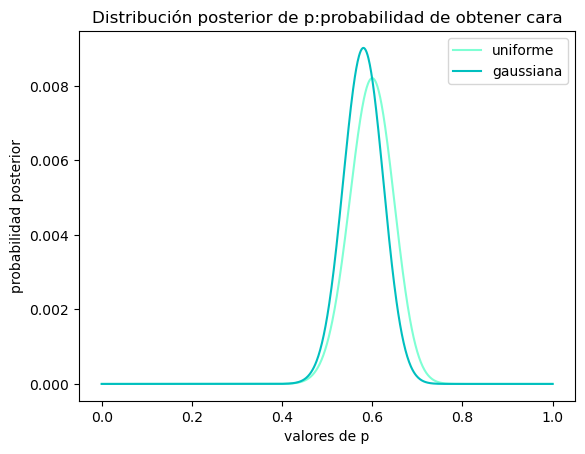

0.001
0.0009999999999999998


In [31]:
plt.plot(valores_p,p_unif_norm,color='aquamarine',label='uniforme')
plt.plot(valores_p,p_gauss_norm,color='#00BFBF',label='gaussiana')
plt.xlabel('valores de p')
plt.ylabel('probabilidad posterior')
plt.title('Distribución posterior de p:probabilidad de obtener cara')
plt.legend()
plt.show()
media_gauss=np.mean(p_gauss_norm)
media_unif=np.mean(p_unif_norm)
print(media_gauss)
print(media_unif)

 Ejercicio 8. Frecuentistas vs Bayesianos
Supongase que se mide el tiempo de decaimiento de una part ́ıcula, el cual es modelado como una
funcion exponencial con constante de decaimiento λ.
 Simule 50 mediciones del tiempo de decaimiento
 Estime λ utilizando el estimador de Maximum Likelihood
 Estime λ utilizando inferencia Bayesiana asumiendo un prior plano
 Compare las dos estimaciones.

 Sabemos que el tiempo de decaimiento de una partícula sigue una distribución exponencial, la cual está dada por:

**PDF (Función de Densidad de Probabilidad):**

$$
P(t; \lambda) = \lambda e^{-\lambda t} \quad \text{para} \quad t \geq 0
$$

**CDF (Función de Distribución Acumulada):**

$$
F(t; \lambda) = 1 - e^{-\lambda t} \quad \text{para} \quad t \geq 0
$$


Sabemos que el tiempo de decaimiento de una partícula sigue una distribución exponencial, la cual está dada por:

$$
P(t;\lambda) = \lambda e^{-\lambda t}
$$

Donde \( t \) es el tiempo de decaimiento y \( \lambda \) es la constante de decaimiento. Usaremos la función inversa de la CDF para generar las mediciones. Si generamos números aleatorios uniformemente distribuidos \( y \), podemos obtener muestras de la distribución exponencial como:

$$
t = -\frac{\ln(1 - y)}{\lambda}
$$

Donde \( y \) es un número aleatorio entre 0 y 1.


 La función de verosimilitud para una muestra de tiempos de decaimiento \( t_i \) es:

$$
L(\lambda) = \prod_{i=1}^{N} \lambda e^{-\lambda t_i}
$$

Maximizar esta verosimilitud con respecto a \( \lambda \) nos da el estimador de máxima verosimilitud:

$$
\hat{\lambda}_{\text{MLE}} = \frac{N}{\sum_{i=1}^N t_i}
$$
Asumimos un prior plano (uniforme) en \( \lambda \). La probabilidad posterior es proporcional a la verosimilitud, así que podemos calcular la probabilidad posterior como:

$$
P(\lambda | \{t_i\}) \propto L(\lambda)
$$

Para esto, podemos calcular la posterior en un rango de valores de \( \lambda \) y encontrar el valor de \( \lambda \) que maximiza la posterior.


In [32]:
#Primero defino las funciones 
#Función de Densidad de Probabilidad
def pdf(t,lam):
    y=lam*(np.exp(-lam*t))
    return(lam)

In [33]:
#Función de Distribución Acumulada
def cdf(t,lam):
    y=(1-np.exp(-lam*t))
    return(y)

In [34]:
# Inversa de la Función de Distribución Acumulada
def inv_cdf(y,lam):
    t=-(np.log(1-y))/lam
    return(t)

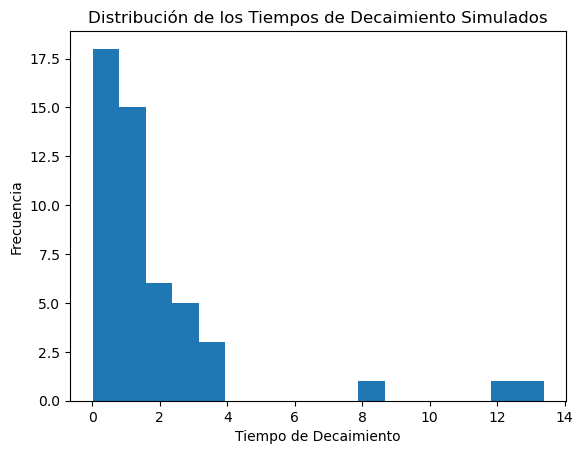

Estimación de $\lambda$ (MLE): 0.5317549241979087


In [46]:
#Vamos a generar 50 mediciones de tiempos de decaimiento usando la función inversa de la CDF
#valores random
n=50 #Define la cantidad de mediciones de tiempo de decaimiento
valores_random=np.random.uniform(0,1,n) #Genera n valores aleatorios uniformemente distribuidos entre 0 y 1, que representarán los valores y en la función inversa de la CDF.
lam=0.5 #valor_real_lambda
tiempo_decaimiento=inv_cdf(valores_random,lam) #Utiliza la función inversa de la CDF para convertir los valores aleatorios generados en tiempos de decaimiento simulados
#Para una distribución exponencial, el MLE de λ es el inverso del promedio de los tiempos de decaimiento simulados.
lambda_mle=1/np.mean(tiempo_decaimiento)
plt.hist(tiempo_decaimiento,bins='auto')
plt.xlabel('Tiempo de Decaimiento')
plt.ylabel('Frecuencia')
plt.title('Distribución de los Tiempos de Decaimiento Simulados')
plt.show()
print(r'Estimación de $\lambda$ (MLE):', lambda_mle)

% Verosimilitud L(λ)
$
L(\lambda) = \prod_{i=1}^n \lambda e^{-\lambda t_i} = \lambda^n e^{-\lambda \sum_{i=1}^n t_i}
$

% Logaritmo de la Verosimilitud (Log-Verosimilitud)
$
\log L(\lambda) = n \log \lambda - \lambda \sum_{i=1}^n t_i
$


In [ ]:
#A continuacion, queremos estimar lambda a partir de Maximum Likelihood.
#Tenemos que definir en principio la funcion likelihood
def log_likelihood(lam,ts):
    L_lam=n*np.log(lam)-lam*np.sum(ts)
